In [1]:
from matplotlib import pyplot as plt
import numpy as np
from src.models.utils import linear_solve, rbf, compute_mse
from src.systems.utils import load_function, plot_function

## Load Linear Data

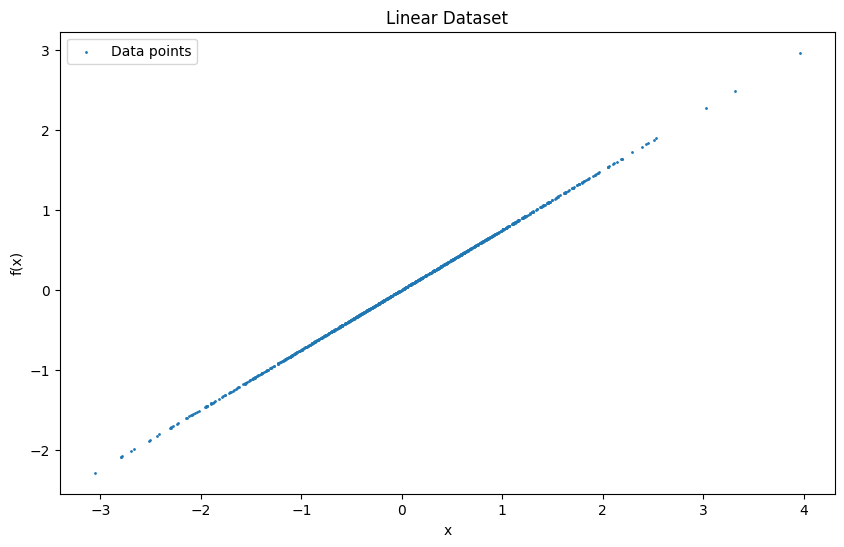

In [2]:
x_linear, y_linear = load_function("./data/function_linear.txt")
y_linear = y_linear.reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x_linear, y_linear, s=1, label='Data points')
plt.title('Linear Dataset')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [3]:
print("x_linear shape:", x_linear.shape)
print("y_linear shape:", y_linear.shape)

x_linear shape: (1000, 1)
y_linear shape: (1000, 1)


### Linear Approximation

In [4]:
# Fit linear function
A_linear = linear_solve(x_linear, y_linear, rcond=1e-10)
y_pred_linear = x_linear @ A_linear

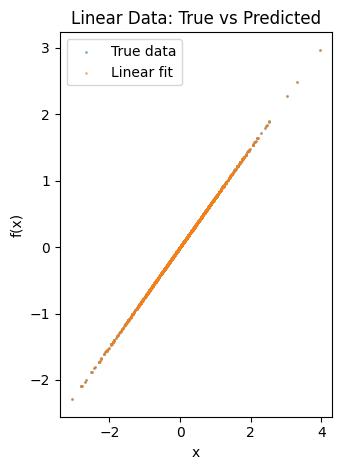

In [5]:
# Plot comparison
plt.subplot(122)
plt.scatter(x_linear, y_linear, s=1, label='True data', alpha=0.5)
plt.scatter(x_linear, y_pred_linear, s=1, label='Linear fit', alpha=0.5)
plt.title('Linear Data: True vs Predicted')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# For the linear coefficient print
if A_linear.size == 1:
    # If it's a single coefficient
    print(f"Linear coefficient: {A_linear.item():.8f}")
else:
    # If it's a vector of coefficients
    print("Linear coefficients:", A_linear.flatten())

# Print MSE
print(f"Mean Squared Error: {compute_mse(y_linear, y_pred_linear):.10f}")

Linear coefficient: 0.75000024
Mean Squared Error: 0.0000000001


### Non-Linear Approximation

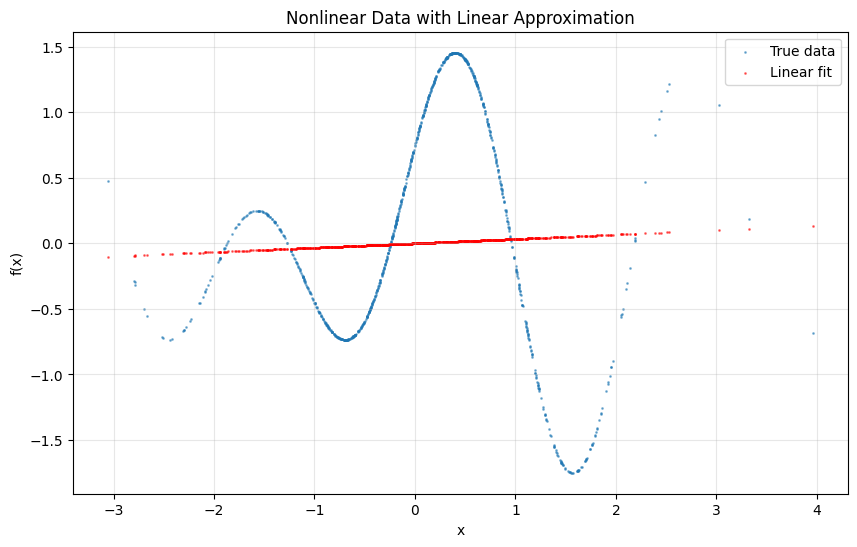

Linear coefficient for nonlinear data: 0.03321036
Mean Squared Error for linear fit: 0.7748919879


In [7]:
# Part 2: Approximate nonlinear data with linear function
x_nonlinear, y_nonlinear = load_function("./data/function_nonlinear.txt")
x_nonlinear = x_nonlinear.reshape(-1, 1)
y_nonlinear = y_nonlinear.reshape(-1, 1)

# Fit linear function to nonlinear data
A_nonlinear = linear_solve(x_nonlinear, y_nonlinear, rcond=1e-10)

# Make predictions
y_pred_nonlinear = x_nonlinear @ A_nonlinear

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_nonlinear, y_nonlinear, s=1, label='True data', alpha=0.5)
plt.scatter(x_nonlinear, y_pred_nonlinear, s=1, label='Linear fit', alpha=0.5, color='red')
plt.title('Nonlinear Data with Linear Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print results
if A_nonlinear.size == 1:
    print(f"Linear coefficient for nonlinear data: {A_nonlinear.item():.8f}")
print(f"Mean Squared Error for linear fit: {compute_mse(y_nonlinear, y_pred_nonlinear):.10f}")

In [8]:
# Print results
print(f"Linear coefficient: {A_linear.item():.8f}")  # Using .item() to extract the scalar value
print(f"Mean Squared Error: {compute_mse(y_linear, y_pred_linear):.10f}")

Linear coefficient: 0.75000024
Mean Squared Error: 0.0000000001


### RBF Approximation

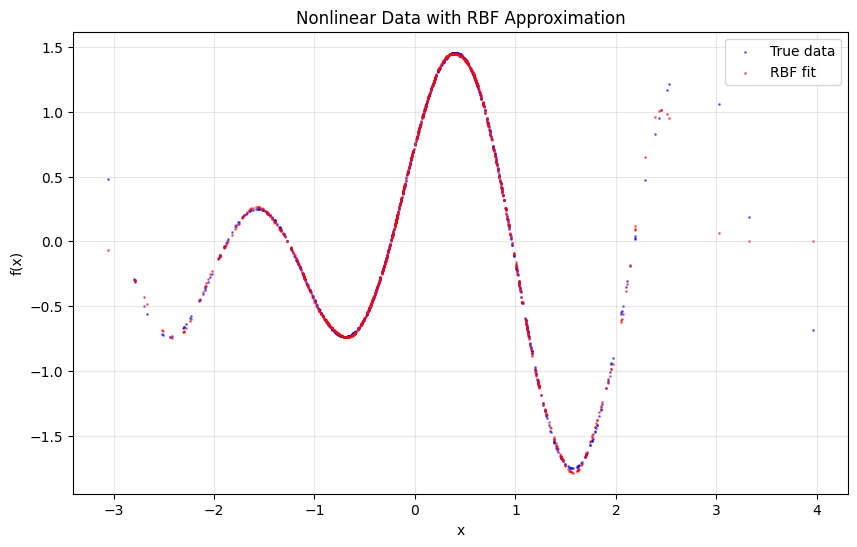

Mean Squared Error for RBF fit: 0.0021012143


In [9]:
# Load nonlinear data
x_nonlinear, y_nonlinear = load_function("./data/function_nonlinear.txt")
x_nonlinear = x_nonlinear.reshape(-1, 1)
y_nonlinear = y_nonlinear.reshape(-1, 1)

# Choose number of RBF centers and epsilon
L = 50  # Number of centers
epsilon = 0.5  # Bandwidth parameter

# Create RBF centers by randomly selecting from data points
indices = np.random.choice(len(x_nonlinear), L, replace=False)
centers = x_nonlinear[indices]

# Compute RBF features
phi = rbf(x_nonlinear, centers, epsilon)

# Solve for coefficients using least squares
C = np.linalg.lstsq(phi, y_nonlinear, rcond=1e-10)[0]

# Make predictions
y_pred_rbf = phi @ C

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_nonlinear, y_nonlinear, s=1, label='True data', alpha=0.5, color='blue')
plt.scatter(x_nonlinear, y_pred_rbf, s=1, label='RBF fit', alpha=0.5, color='red')
plt.title('Nonlinear Data with RBF Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print MSE
print(f"Mean Squared Error for RBF fit: {compute_mse(y_nonlinear, y_pred_rbf):.10f}")

In [10]:
print("="*50)
print("TASK 1 RESULTS SUMMARY")
print("="*50)

# Part 1: Linear Data with Linear Approximation
print("\nPART 1: Linear Data Results")
print("-"*30)
print(f"Linear coefficient: {A_linear.item():.8f}")
print(f"Mean Squared Error: {compute_mse(y_linear, y_pred_linear):.10f}")

# Part 2: Nonlinear Data with Linear Approximation
print("\nPART 2: Nonlinear Data with Linear Approximation")
print("-"*30)
print(f"Linear coefficient: {A_nonlinear.item():.8f}")
print(f"Mean Squared Error: {compute_mse(y_nonlinear, y_pred_nonlinear):.10f}")

# Part 3: Nonlinear Data with RBF Approximation
print("\nPART 3: Nonlinear Data with RBF Approximation")
print("-"*30)
print(f"Number of RBF centers: {L}")
print(f"Epsilon value: {epsilon:.4f}")
print(f"Mean Squared Error: {compute_mse(y_nonlinear, y_pred_rbf):.10f}")

print("\nComparison of MSE values:")
print("-"*30)
print(f"Linear data (linear fit):     {compute_mse(y_linear, y_pred_linear):.10f}")
print(f"Nonlinear data (linear fit):  {compute_mse(y_nonlinear, y_pred_nonlinear):.10f}")
print(f"Nonlinear data (RBF fit):     {compute_mse(y_nonlinear, y_pred_rbf):.10f}")

TASK 1 RESULTS SUMMARY

PART 1: Linear Data Results
------------------------------
Linear coefficient: 0.75000024
Mean Squared Error: 0.0000000001

PART 2: Nonlinear Data with Linear Approximation
------------------------------
Linear coefficient: 0.03321036
Mean Squared Error: 0.7748919879

PART 3: Nonlinear Data with RBF Approximation
------------------------------
Number of RBF centers: 50
Epsilon value: 0.5000
Mean Squared Error: 0.0021012143

Comparison of MSE values:
------------------------------
Linear data (linear fit):     0.0000000001
Nonlinear data (linear fit):  0.7748919879
Nonlinear data (RBF fit):     0.0021012143
